In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BD03CFF98>,
      dtype=object)

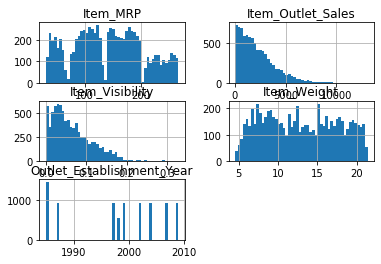

In [6]:
df.hist(bins=50)

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
cols=['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
si=SimpleImputer(strategy='most_frequent')

In [14]:
df[ 'Outlet_Size']=si.fit_transform(df[ 'Outlet_Size'].values.reshape(-1,1))

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
for m in cols:
    df[m]=le.fit_transform(df[m])

In [17]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [18]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048833,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.048833,1.000000,-0.018929,-0.014048,0.030765,0.027141,-0.007995,-0.011588,-0.007749,0.004715,-0.001088,0.014123
Item_Fat_Content,-0.098114,-0.018929,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.014048,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.030765,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.027141,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007995,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.011588,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007749,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004715,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


In [19]:
df.drop('Outlet_Establishment_Year',inplace=True,axis=1)

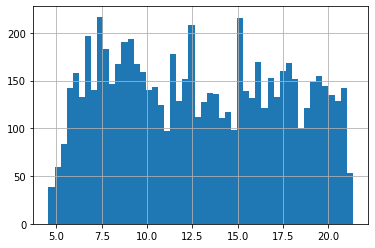

In [20]:
df['Item_Weight'].hist(bins=50)

In [21]:
sim=SimpleImputer(strategy='mean')

In [22]:
df['Item_Weight']=sim.fit_transform(df['Item_Weight'].values.reshape(-1,1))

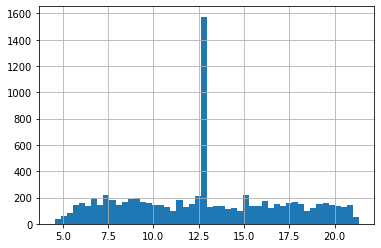

In [23]:
df['Item_Weight'].hist(bins=50)

In [24]:
x=df.iloc[:,0:-1]

In [25]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [26]:
test=pd.read_csv('test.csv')

In [27]:
lr,knn,rfr,dtr=LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(),DecisionTreeRegressor()

In [28]:
for m in model:
    m.fit(x,y)
    print(m.score(x,y))

NameError: name 'model' is not defined

In [29]:
lr.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lr.score(x,y)

0.5102755843186974

In [31]:
dtr=DecisionTreeRegressor()

In [32]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [33]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [34]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [35]:
test['Outlet_Size']=si.fit_transform(test['Outlet_Size'].values.reshape(-1,1))

In [36]:
test['Item_Weight']=sim.fit_transform(test['Item_Weight'].values.reshape(-1,1))

In [37]:
for m in cols:
    test[m]=le.fit_transform(test[m])

In [38]:
test.drop('Outlet_Establishment_Year',inplace=True,axis=1)

In [39]:
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
cv=cross_val_score(lr,x,y,cv=15,scoring='r2')

In [41]:
cv.mean()

0.5074487169714027

In [42]:
cv.std()

0.022034308801296146

In [43]:
imp=dtr.feature_importances_

In [44]:
col=x.columns

In [45]:
imp=pd.DataFrame({'col':col,'important':imp})

In [46]:
imp.sort_values('important')

,col,important
8,Outlet_Location_Type,0.008227
7,Outlet_Size,0.011426
2,Item_Fat_Content,0.013224
6,Outlet_Identifier,0.028628
4,Item_Type,0.031123
1,Item_Weight,0.038414
0,Item_Identifier,0.061622
3,Item_Visibility,0.095840
9,Outlet_Type,0.276079
5,Item_MRP,0.435418


In [47]:
df.drop('Outlet_Identifier',inplace=True,axis=1)

In [48]:
df.drop('Item_Identifier',inplace=True,axis=1)

In [49]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1].values.reshape(-1,1)

In [50]:
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [51]:
cv=cross_val_score(dtr,x,y,cv=15,scoring='r2')

In [52]:
cv.mean()

0.18000117952135855

In [53]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
cv=cross_val_score(lr,x,y,cv=15,scoring='r2')

In [55]:
cv.mean()

0.5052890832287558

In [56]:
rfr=RandomForestRegressor(n_estimators=200)

In [57]:
rfr.fit(x,y)

C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
cv=cross_val_score(rfr,x,y,cv=15,scoring='r2')

In [60]:
cv.mean()

0.5476049050145042

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
ss=StandardScaler()

In [63]:
co=df.columns

In [64]:
for m in co:
    df[m]=ss.fit_transform(df[m].values.reshape(-1,1))

In [65]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,-0.572844,-0.970732,-0.766479,1.747454,-0.284581,-1.369334,-0.252658,0.910601
1,-1.641706,0.978092,-0.908111,1.608963,-1.489023,-0.284581,1.091569,1.002972,-1.018440
2,1.098554,-0.572844,-0.956917,0.658786,0.010040,-0.284581,-1.369334,-0.252658,-0.049238
3,1.500838,0.978092,-1.281758,-0.291391,0.660050,-0.284581,1.091569,-1.508289,-0.849103
4,-0.929428,-0.572844,-1.281758,0.421242,-1.399220,-1.950437,1.091569,-0.252658,-0.695373


In [66]:
co=test.columns

In [67]:
for m in co:
    test[m]=ss.fit_transform(test[m].values.reshape(-1,1))

In [102]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1].values.reshape(-1,1)

In [103]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
cv=cross_val_score(lr,x,y,cv=15,scoring='r2')

In [105]:
cv.mean()

0.4856329508496685

In [106]:
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [107]:
cv=cross_val_score(knn,x,y,cv=15,scoring='r2')

In [108]:
cv.mean()

0.5107226115284168

In [109]:
rfr.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [110]:
cv=cross_val_score(rfr,x,y,cv=15,scoring='r2')

In [111]:
cv.mean()

0.5394290607676514

In [112]:
cv.std()

0.03697645701867807

In [113]:
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [114]:
cv=cross_val_score(dtr,x,y,cv=15,scoring='r2')

In [115]:
cv.mean()

0.20695731178940416

In [116]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [117]:
imp=rfr.feature_importances_

In [118]:
col=x.columns

In [119]:
rfr.feature_importances_

array([0.05333008, 0.01677762, 0.12295751, 0.04484552, 0.46351468,
       0.02107178, 0.2775028 ])

In [120]:
imp=pd.DataFrame({'imp':imp,'col':col})

In [121]:
imp.sort_values('imp')

,imp,col
1,0.016778,Item_Fat_Content
5,0.021072,Outlet_Size
3,0.044846,Item_Type
0,0.053330,Item_Weight
2,0.122958,Item_Visibility
6,0.277503,Outlet_Type
4,0.463515,Item_MRP


In [88]:
df.drop('Outlet_Location_Type',inplace=True,axis=1)

In [122]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [123]:
col=np.array(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Size', 'Outlet_Type'])

In [124]:
col

array(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Type'], dtype='<U16')

In [125]:
col.shape

(7,)

In [126]:
lr.coef_

array([[-0.00275155,  0.01349728, -0.06021213, -0.00319997,  0.56849134,
        -0.00654764,  0.39094603]])

In [127]:
coeff.shape

(8,)

In [130]:
coeff=np.array([-0.00275155,  0.01349728, -0.06021213, -0.00319997,  0.56849134,-0.00654764,  0.39094603])

In [131]:
coefff=pd.DataFrame({'col':col,'coef':coeff})

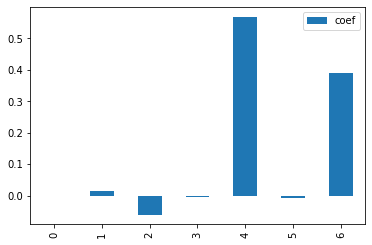

In [132]:
coefff.plot.bar()

In [135]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [137]:
rd=Ridge()

In [148]:
rd.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [149]:
rd.score(x,y)

0.4879897697713611

In [142]:
cv=cross_val_score(rd,x,y,cv=15,scoring='r2')

In [143]:
cv.mean()

0.4856333535306451

In [144]:
cv.std()

0.02179752774109799

In [150]:
rd.coef_

array([[-0.00274976,  0.01349567, -0.0602127 , -0.00319754,  0.56842448,
        -0.00655606,  0.39089822]])

In [156]:
ls=ElasticNet()

In [157]:
ls.fit(x,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
ls.coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.04504963,
       -0.        ,  0.        ])

In [159]:
cv=cross_val_score(ls,x,y,cv=15,scoring='r2')

In [160]:
cv.mean()

0.048350301694161386